<center>
  <h1 style="background: linear-gradient(45deg, #FF5733, #FFC300); color: #000000; font-size: 36px; font-weight: bold; font-family: 'Arial', sans-serif; border: 2px solid #FFC300; padding: 10px; border-radius: 8px; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">MNIST</h1>
</center>



# <span style="color: #FF5733; font-family: 'Arial', sans-serif; font-size: 30px;">Introduction</span>

The MNIST database of handwritten digits.


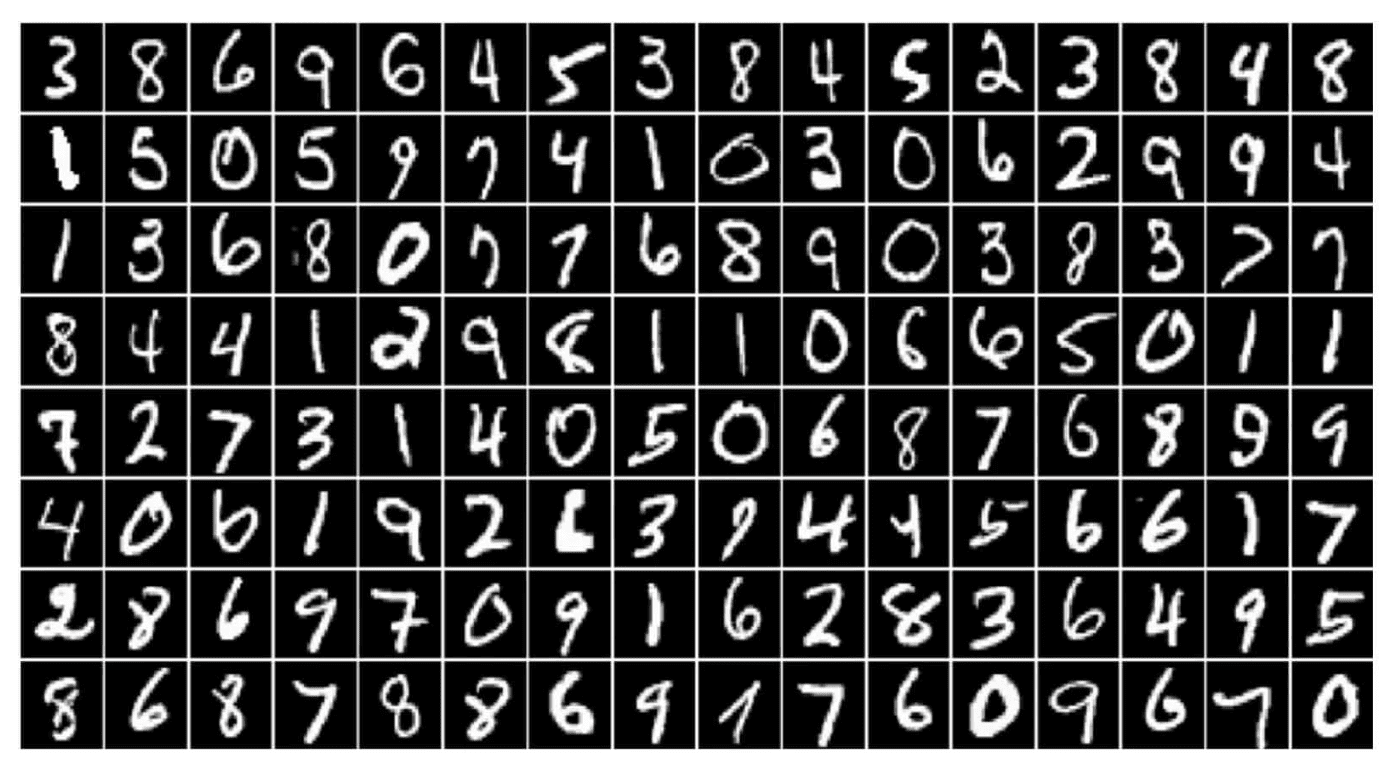

# <span style="color: #FF5733; font-family: 'Arial', sans-serif; font-size: 30px;">Importing libraries</span>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras 
from keras.utils import plot_model
%matplotlib inline

# <span style="color: #FF5733; font-family: 'Arial', sans-serif; font-size: 30px;">Reading data</span>


In [2]:
train = pd.read_csv('/kaggle/input/mnist-60000-hand-written-number-images/mnist_train.csv')
test = pd.read_csv('/kaggle/input/mnist-60000-hand-written-number-images/mnist_test.csv')

In [3]:
print('the shape of train {}'.format(train.shape))
print('the shape of test {}'.format(test.shape))

the shape of train (59999, 785)
the shape of test (9999, 785)


In [4]:
train

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info

<bound method DataFrame.info of        5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0      0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1      4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2      1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3      9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4      2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
...   .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
59994  8  0    0    0    0    0    0    0    0    0  ...      0      0      0   
59995  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
59996  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
59997  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   
59998  8  0    0    0    0    0    0    0    0    0  ...      0      0      0

In [7]:
test.info

<bound method DataFrame.info of       7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0     2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2     0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3     4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4     1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
...  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
9994  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9995  3  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9996  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9997  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9998  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

      0

# <span style="color: #FF5733; font-family: 'Arial', sans-serif; font-size: 30px;"> Splitting dataset</span>


In [8]:
x_train = train.drop('5',axis=1).values
y_train = train['5'].values



x_test = test.drop('7',axis=1).values
y_test = test['7'].values

# <span style="color: #FF5733; font-family: 'Arial', sans-serif; font-size: 30px;">  Preprocessing</span>


In [9]:
x_train,x_test = x_train.reshape(-1,28*28),x_test.reshape(-1,28*28)

# Normalization
x_train,x_test = x_train/255,x_test/255


y_train,y_test = tf.one_hot(y_train,10),tf.one_hot(y_test,10)

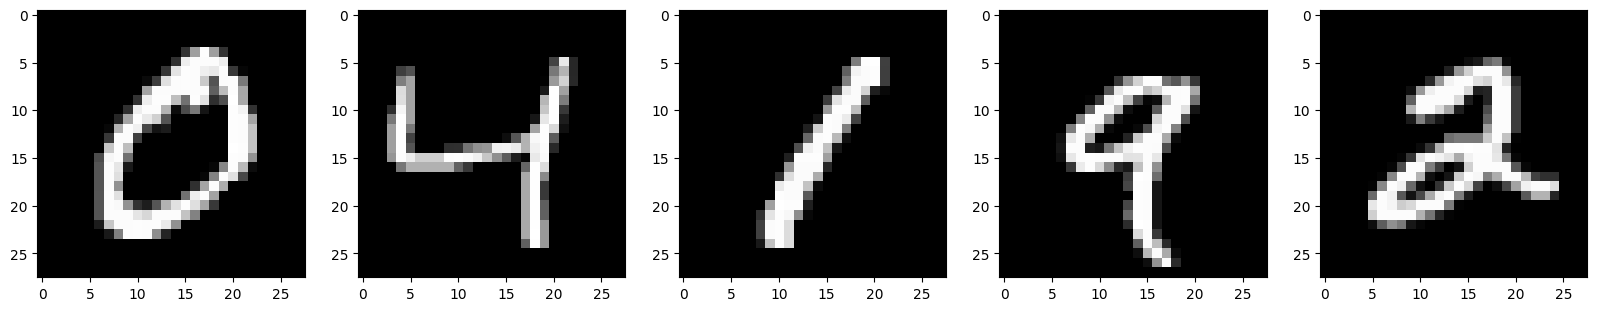

In [10]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
plt.show()

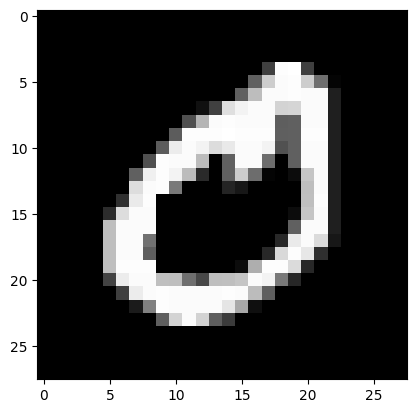

In [11]:
plt.imshow(x_train[20].reshape(28,28),cmap='gray')

# <span style="color: #FF5733; font-family: 'Arial', sans-serif; font-size: 30px;">   Model </span>


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[784]),
    tf.keras.layers.Dense(128,activation ='relu'),
    tf.keras.layers.Dense(10,activation ='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


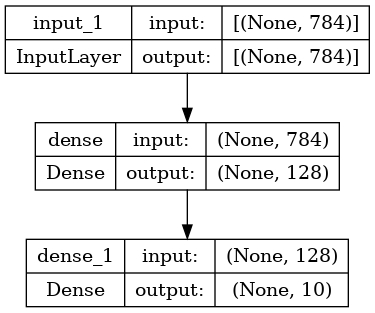

In [14]:
keras.utils.plot_model(model,to_file="model.png",show_shapes=True,show_layer_names=True)

In [15]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['CategoricalAccuracy'])

In [16]:
history=model.fit(x=x_train,y=y_train,batch_size=32,
                  epochs=20,
                  callbacks=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_categorical_accuracy',restore_best_weights=True),
                 validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2812 - categorical_accuracy: 0.9203 - val_loss: 0.1283 - val_categorical_accuracy: 0.9652
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1253 - categorical_accuracy: 0.9633 - val_loss: 0.0972 - val_categorical_accuracy: 0.9732
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0863 - categorical_accuracy: 0.9747 - val_loss: 0.0831 - val_categorical_accuracy: 0.9762
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0642 - categorical_accuracy: 0.9799 - val_loss: 0.0900 - val_categorical_accuracy: 0.9725
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0487 - categorical_accuracy: 0.9847 - val_loss: 0.0809 - val_categorical_accuracy: 0.9770
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0396 - categorical_accuracy: 0.9882 - val_loss: 0.0787 - val_categorical_accuracy:

In [17]:
model.save('model.h5')

# <span style="color: #FF5733; font-family: 'Arial', sans-serif; font-size: 30px;">  Training history (loss) </span>


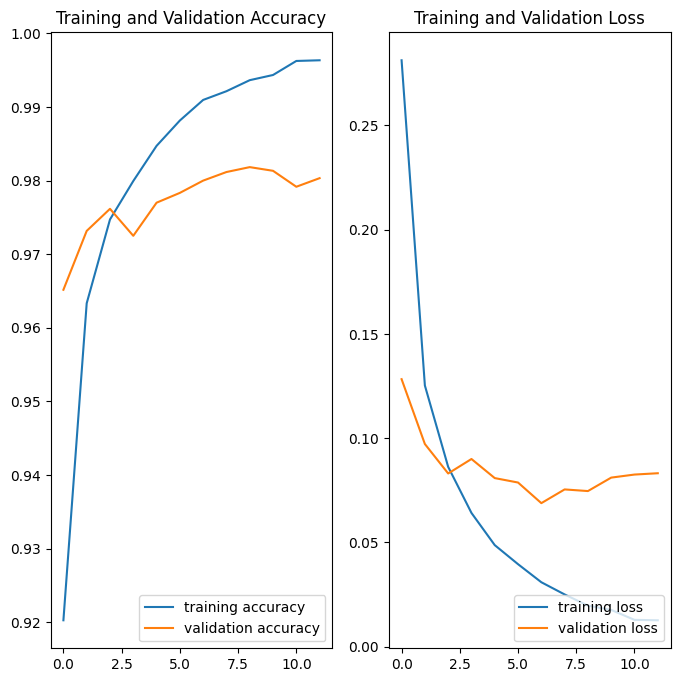

In [18]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='training accuracy')
plt.plot(epochs_range, val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='training loss')
plt.plot(epochs_range, val_loss, label='validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()


In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0782 - categorical_accuracy: 0.9777


[0.0782381221652031, 0.9776977896690369]

In [20]:
y_pred = model.predict(x_test)

print('predicted label :{}'.format(np.argmax(y_pred[4])))

313/313 [==============================] - 1s 2ms/step
predicted label :1


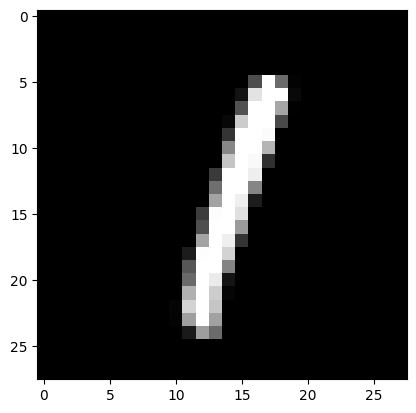

In [21]:
plt.imshow(x_test[4].reshape(28,28),cmap='gray')

In [22]:
for i in range(5):
    print('predicted label :{}'.format(np.argmax(y_pred[i])))

predicted label :2
predicted label :1
predicted label :0
predicted label :4
predicted label :1


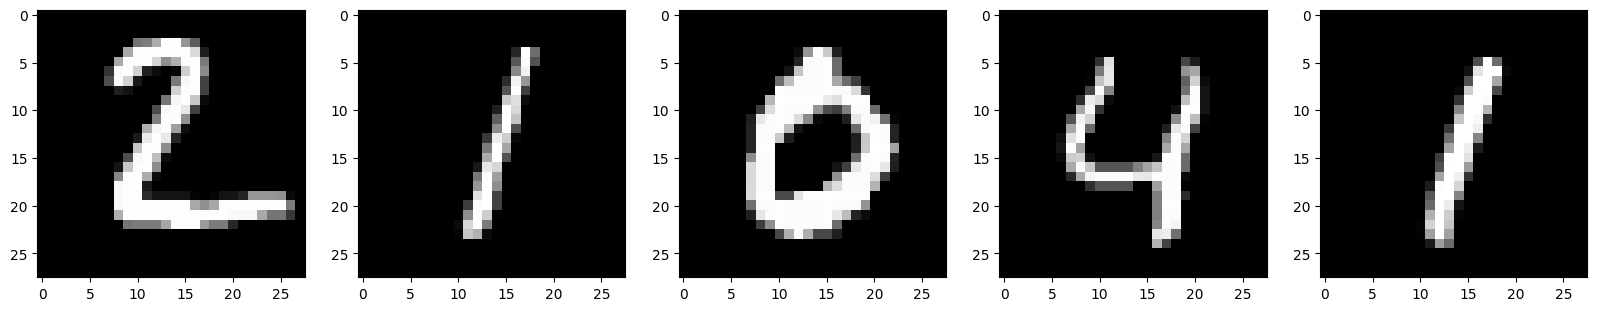

In [23]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.show()